In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from skimage.color import rgb2hsv, rgb2gray, rgb2yuv
from skimage import color, exposure, transform
from skimage.exposure import equalize_hist
from skimage.transform import resize

%matplotlib inline

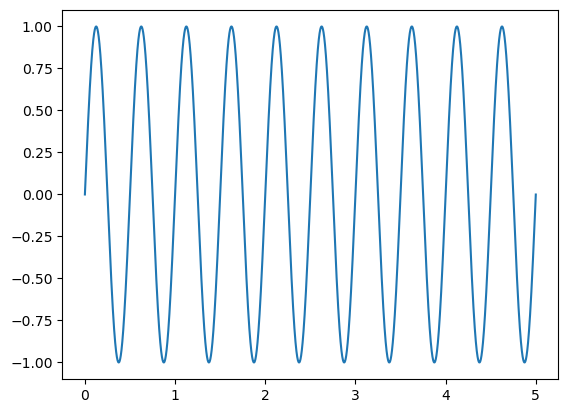

In [2]:
import numpy as np
from matplotlib import pyplot as plt

SAMPLE_RATE = 44100  # Hertz
DURATION = 5  # Seconds

def generate_sine_wave(freq, sample_rate, duration):
    x = np.linspace(0, duration, sample_rate * duration, endpoint=False)
    frequencies = x * freq
    # 2pi because np.sin takes radians
    y = np.sin((2 * np.pi) * frequencies)
    return x, y

# Generate a 2 hertz sine wave that lasts for 5 seconds
x, y = generate_sine_wave(2, SAMPLE_RATE, DURATION)
plt.plot(x, y)
plt.show()

In [3]:
_, nice_tone = generate_sine_wave(400, SAMPLE_RATE, DURATION)
_, noise_tone = generate_sine_wave(4000, SAMPLE_RATE, DURATION)
noise_tone = noise_tone * 0.3

mixed_tone = nice_tone + noise_tone

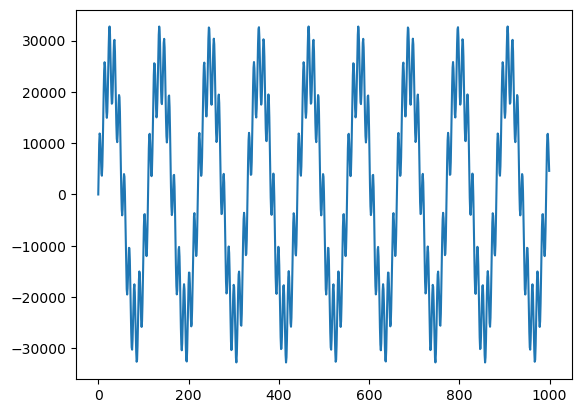

In [5]:
normalized_tone = np.int16((mixed_tone / mixed_tone.max()) * 32767)

plt.plot(normalized_tone[:1000])
plt.show()

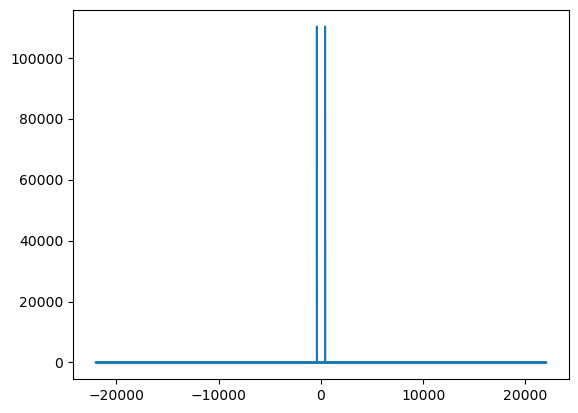

In [6]:
from scipy.fft import fft, fftfreq

# Number of samples in normalized_tone
N = SAMPLE_RATE * DURATION

yf = fft(nice_tone)
xf = fftfreq(N, 1 / SAMPLE_RATE)

plt.plot(xf, np.abs(yf))
plt.show()

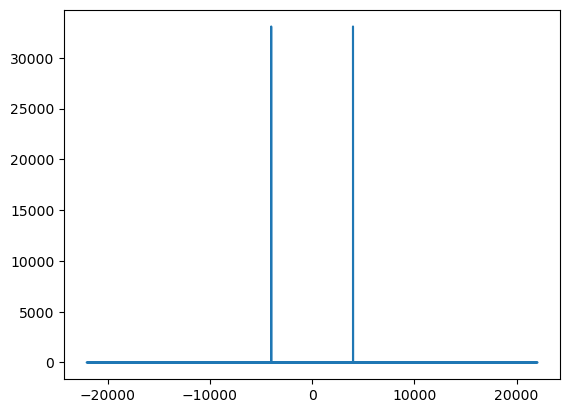

In [7]:
from scipy.fft import fft, fftfreq

# Number of samples in normalized_tone
N = SAMPLE_RATE * DURATION

yf = fft(noise_tone)
xf = fftfreq(N, 1 / SAMPLE_RATE)

plt.plot(xf, np.abs(yf))
plt.show()

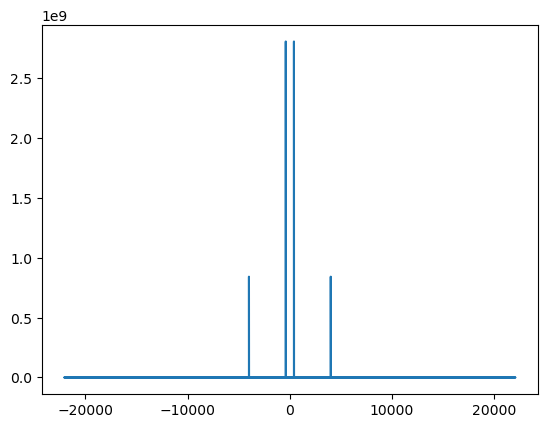

In [8]:
from scipy.fft import fft, fftfreq

# Number of samples in normalized_tone
N = SAMPLE_RATE * DURATION

yf = fft(normalized_tone)
xf = fftfreq(N, 1 / SAMPLE_RATE)

plt.plot(xf, np.abs(yf))
plt.show()

In [12]:
np.where(np.abs(yf)>1)

(array([     2,      4,      6, ..., 220494, 220496, 220498]),)

In [13]:
dark_image = imread('/Users/rsingh/Data/balloon/train/10464445726_6f1e3bbe6a_k.jpg')
dark_image = resize(dark_image,(480,480))

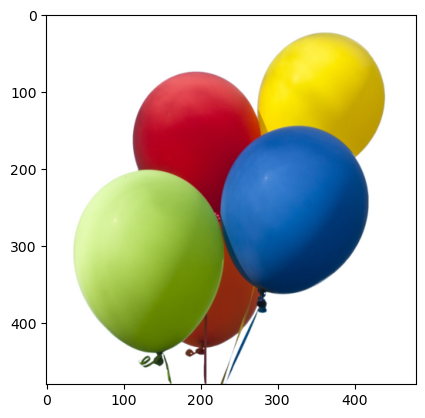

In [14]:
plt.imshow(dark_image)

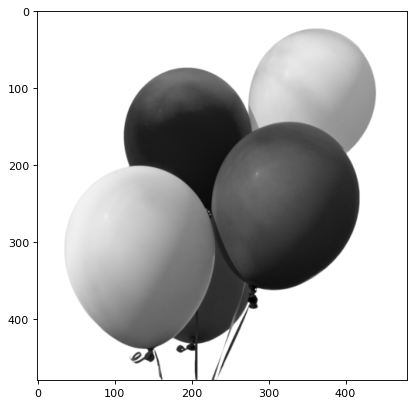

In [15]:
dark_image_grey = rgb2gray(dark_image)
plt.figure(num=None, figsize=(8, 6), dpi=80)
plt.imshow(dark_image_grey, cmap='gray');

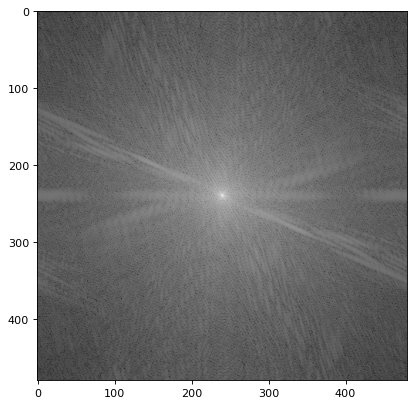

In [18]:
dark_image_grey_fourier = np.fft.fftshift(np.fft.fft2(dark_image_grey))
plt.figure(num=None, figsize=(8, 6), dpi=80)
plt.imshow(np.log(abs(dark_image_grey_fourier)), cmap='gray');

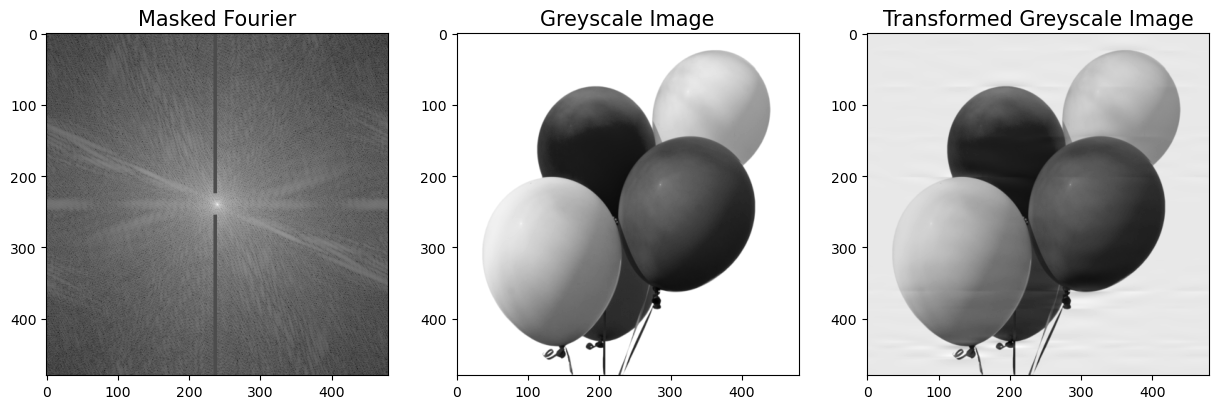

In [20]:
def fourier_masker_ver(image, i):
    f_size = 15
    dark_image_grey_fourier = np.fft.fftshift(np.fft.fft2(rgb2gray(image)))
    dark_image_grey_fourier[:225, 235:240] = i
    dark_image_grey_fourier[-225:,235:240] = i
    fig, ax = plt.subplots(1,3,figsize=(15,15))
    ax[0].imshow(np.log(abs(dark_image_grey_fourier)), cmap='gray')
    ax[0].set_title('Masked Fourier', fontsize = f_size)
    ax[1].imshow(rgb2gray(image), cmap = 'gray')
    ax[1].set_title('Greyscale Image', fontsize = f_size);
    ax[2].imshow(abs(np.fft.ifft2(dark_image_grey_fourier)), 
                     cmap='gray')
    ax[2].set_title('Transformed Greyscale Image', 
                     fontsize = f_size);
    
fourier_masker_ver(dark_image, 1)

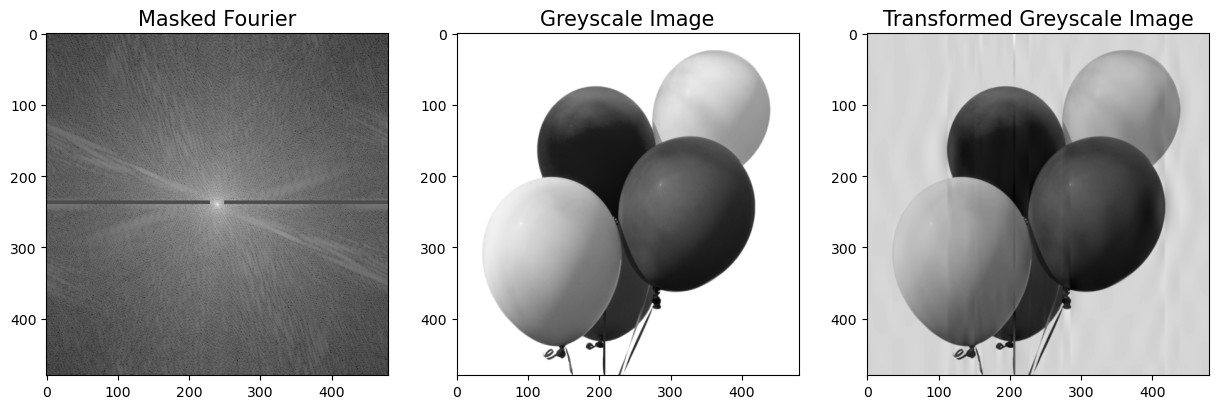

In [21]:
def fourier_masker_hor(image, i):
    f_size = 15
    dark_image_grey_fourier =np.fft.fftshift(np.fft.fft2(rgb2gray(image)))
    dark_image_grey_fourier[235:240, :230] = i
    dark_image_grey_fourier[235:240,-230:] = i
    fig, ax = plt.subplots(1,3,figsize=(15,15))
    ax[0].imshow(np.log(abs(dark_image_grey_fourier)), cmap='gray')
    ax[0].set_title('Masked Fourier', fontsize = f_size)
    ax[1].imshow(rgb2gray(image), cmap = 'gray')
    ax[1].set_title('Greyscale Image', fontsize = f_size);
    ax[2].imshow(abs(np.fft.ifft2(dark_image_grey_fourier)), 
                     cmap='gray')
    ax[2].set_title('Transformed Greyscale Image', 
                     fontsize = f_size);
fourier_masker_hor(dark_image, 1)

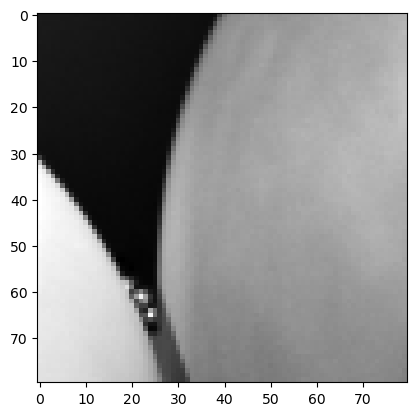

In [22]:
block = dark_image_grey[200:280,200:280]
plt.imshow(block,cmap='gray')

In [24]:
block_fourier = np.fft.fftshift(np.fft.fft2(block))

In [25]:
block_fourier

array([[-0.28895381+1.66533454e-16j, -0.01070552+6.79111138e-02j,
        -0.12726309+9.48406296e-02j, ..., -0.16356506+5.62718517e-02j,
        -0.12726309-9.48406296e-02j, -0.01070552-6.79111138e-02j],
       [-0.15918615-1.37492035e-01j, -0.12065517-1.44012583e-01j,
         0.06250282+4.28307255e-02j, ..., -0.2753134 +1.11367655e-01j,
        -0.22232642-2.45992590e-02j, -0.00875579-5.12525527e-02j],
       [-0.21066858+4.32251651e-03j, -0.28928362-1.10011867e-02j,
        -0.09073296+1.03756759e-01j, ..., -0.16644788-2.52855201e-02j,
        -0.26341346-3.61670376e-02j, -0.1226814 +1.60732743e-01j],
       ...,
       [ 0.01941443-1.02227314e-02j, -0.03754081-3.73885204e-02j,
        -0.02061205+1.55691296e-01j, ..., -0.0516099 +8.39104002e-02j,
        -0.01854424+3.23133449e-02j, -0.05735918+2.02122722e-01j],
       [-0.21066858-4.32251651e-03j, -0.1226814 -1.60732743e-01j,
        -0.26341346+3.61670376e-02j, ..., -0.11864532-1.79767762e-01j,
        -0.09073296-1.03756759e-01j

In [26]:
np.log(abs(dark_image_grey_fourier))

array([[-1.70369428, -1.15190531,  0.00257149, ...,  0.53839216,
         0.00257149, -1.15190531],
       [-1.46034524, -0.3926719 ,  0.18886015, ...,  0.11498687,
         0.54527129,  0.22649235],
       [ 0.21107475,  0.18723176, -1.41112578, ...,  0.52415809,
         0.64401536,  0.1953581 ],
       ...,
       [-0.22446655,  0.06157119,  0.0263983 , ..., -0.43184504,
         0.33669351, -0.2215858 ],
       [ 0.21107475,  0.1953581 ,  0.64401536, ...,  0.10662994,
        -1.41112578,  0.18723176],
       [-1.46034524,  0.22649235,  0.54527129, ...,  0.48252174,
         0.18886015, -0.3926719 ]])

In [20]:
np.sort(abs(block_fourier.reshape(-1)))

array([5.69572987e-03, 5.69572987e-03, 1.29942808e-02, ...,
       2.98641009e+02, 2.98641009e+02, 2.26074539e+03])

In [27]:
trunc_block_fourier = np.zeros_like(block_fourier)
trunc_block_fourier[abs(block_fourier)>1] = block_fourier[abs(block_fourier)>1]

In [30]:
np.count_nonzero(abs(trunc_block_fourier))

2820

In [31]:
np.count_nonzero(abs(block_fourier))

6400

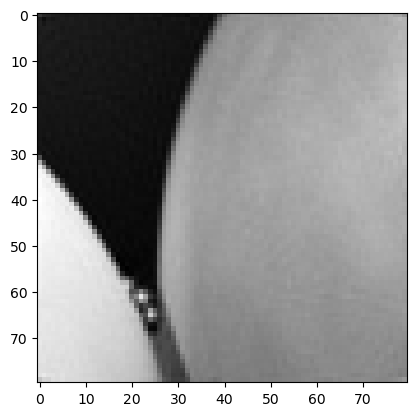

In [34]:
plt.imshow(abs(np.fft.ifft2(trunc_block_fourier)),cmap='gray')

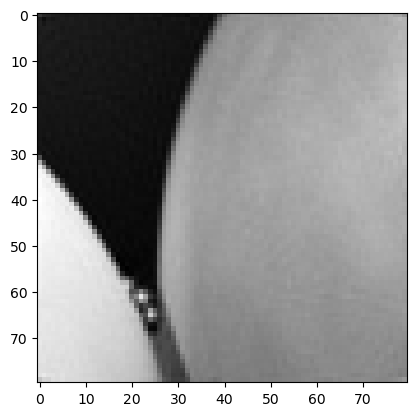

In [34]:
plt.imshow(abs(np.fft.ifft2(trunc_block_fourier)),cmap='gray')

In [45]:
import scipy.fft

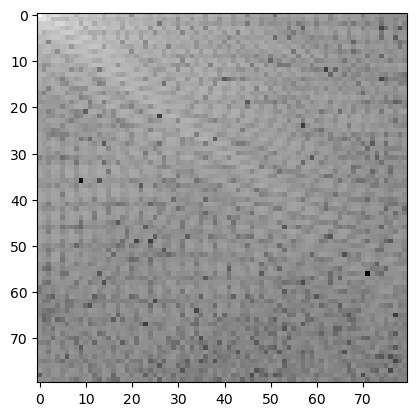

In [50]:
block_cosine = scipy.fft.dctn(block)
plt.imshow(np.log(abs(block_cosine)),cmap='gray')

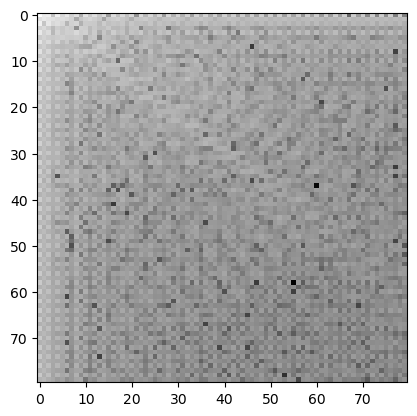

In [52]:
block_sine = scipy.fft.dstn(block)
plt.imshow(np.log(abs(block_sine)),cmap='gray')

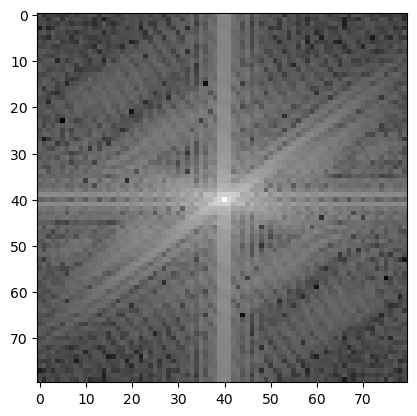

In [51]:
plt.imshow(np.log(abs(block_fourier)),cmap='gray')